# Librerías

In [ ]:
from tensorflow.keras.datasets import imdb

# Dataset

Train_labels, test_labels: 0: calificación negativa, 1: calificación positiva

Train_data, test_data: listas reviews (lista de índices de palabras o repetición). Palabras más repetidas:

*   the
*   and
*   a
*   of
*   to
*   is
*   ...

http://ai.stanford.edu/~amaas/data/sentiment/

In [ ]:
# Utilizar las diez mil palabras más frecuentes

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Decodificar review

word_index = imdb.get_word_index()

inverted_word_index = dict([(i, word)              for (word, i) in word_index.items()])
decoded_sequence = " ".join([inverted_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_sequence

# Los Indices tienen un offset de 3, dado que el 0, 1, y 2 se reservan para “padding,” “inicio de secuencia,” y “unknown.”



"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:


# One hot encoding

# La secuencia original de los datos contiene el índice de las palabras del
# texto, con un vocabulario hasta de 10 mil palabras
# Al convertirlo en one hot, la posición de las palabras que sí estén en la
# secuencia, se dejan como 1, de resto estarán en 0

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Vectorizar las etiquetas (convertir a punto flotante)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Flatten, Conv2D, Dense, MaxPooling2D




from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Modelo

*   No. de capas
*   Neuronas por capa






In [ ]:
model = Sequential([
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])

# Validation Set

In [ ]:
# Distribución: 80 /20

x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

# Entrenamiento

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=4,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/4
40/40 [==============================] - 7s 87ms/step - loss: 0.4822 - accuracy: 0.7945 - val_loss: 0.3675 - val_accuracy: 0.8444
Epoch 2/4
40/40 [==============================] - 2s 49ms/step - loss: 0.2764 - accuracy: 0.8974 - val_loss: 0.2911 - val_accuracy: 0.8842
Epoch 3/4
40/40 [==============================] - 2s 45ms/step - loss: 0.2127 - accuracy: 0.9203 - val_loss: 0.2866 - val_accuracy: 0.8860
Epoch 4/4
40/40 [==============================] - 5s 116ms/step - loss: 0.1814 - accuracy: 0.9330 - val_loss: 0.2949 - val_accuracy: 0.8866


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


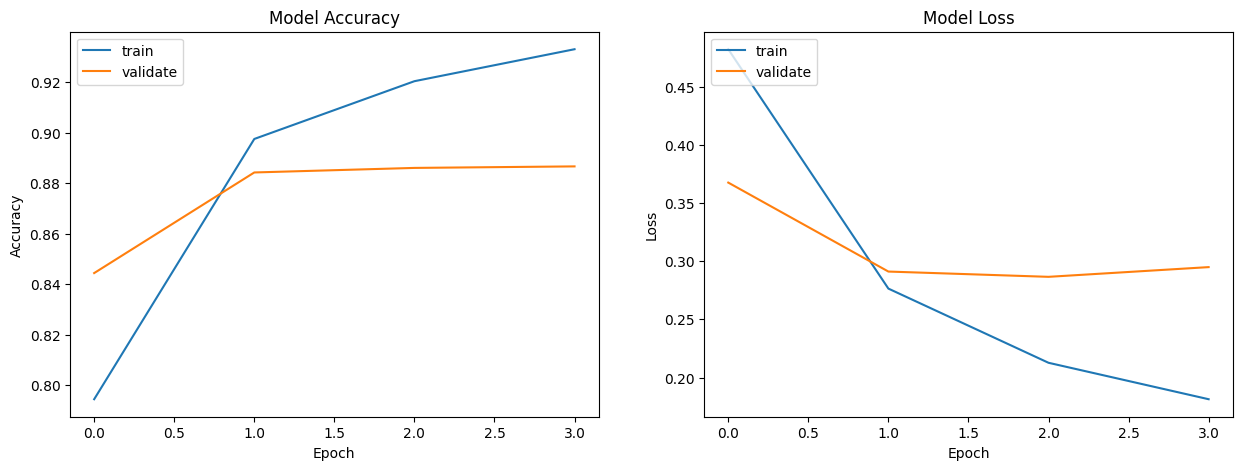

In [ ]:
import matplotlib.pyplot as plt

def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Tomar los datos de accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# Todos los datos de history
print(history.history.keys())

plotmodelhistory(history)

# Predicción

In [ ]:
prediccion = model.predict(x_test)

array([[0.24306335],
       [0.9998573 ],
       [0.8314187 ],
       ...,
       [0.14557625],
       [0.13515595],
       [0.7823291 ]], dtype=float32)

In [ ]:
#prediccion2 = prediccion.argmax(axis=-1)

In [ ]:
#Evaluación

perdida, exactitud = model.evaluate(
    x=x_test,
    y=y_test,
)

782/782 [==============================] - 4s 5ms/step - loss: 0.3127 - accuracy: 0.8778
